<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#1.-데이터-로드" data-toc-modified-id="1.-데이터-로드-1">1. 데이터 로드</a></span></li><li><span><a href="#2.-PCA" data-toc-modified-id="2.-PCA-2">2. PCA</a></span></li><li><span><a href="#3.-K-means" data-toc-modified-id="3.-K-means-3">3. K-means</a></span></li><li><span><a href="#4.-Hierachical" data-toc-modified-id="4.-Hierachical-4">4. Hierachical</a></span></li><li><span><a href="#5.-meanshift" data-toc-modified-id="5.-meanshift-5">5. meanshift</a></span></li><li><span><a href="#6.-ranking-선정" data-toc-modified-id="6.-ranking-선정-6">6. ranking 선정</a></span></li></ul></div>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'Malgun Gothic'

import warnings
warnings.filterwarnings('ignore')

# 1. 데이터 로드

In [29]:
hjd_df = pd.read_csv('./data/클러스터링데이터.csv', encoding='cp949')
hjd_df.head(3)

,행정동코드,읍면동코드,자치행정동,자치구,행정동,거주인구수,낮생활인구비율,총노인시설수,접근성지표,이용편리지표
0,11110530,1101053,종로구 사직동,종로구,사직동,1834,0.042984,0,10.845083,30.0
1,11110540,1101054,종로구 삼청동,종로구,삼청동,641,0.047104,2,2.304008,5.0
2,11110550,1101055,종로구 부암동,종로구,부암동,1763,0.064248,1,7.574081,2.5


In [30]:
# 결측값 확인
hjd_df.isnull().sum()

행정동코드      0
읍면동코드      0
자치행정동      0
자치구        0
행정동        0
거주인구수      0
낮생활인구비율    0
총노인시설수     0
접근성지표      0
이용편리지표     0
dtype: int64

In [31]:
# target 행정동 지정
hjd_df['target'] = 0
target_d = ['부암동', '중곡3동', '전농1동', '망우3동', '돈암1동', '장위2동', '역촌동', '홍제3동', '서림동', '반포본동', '일원1동', '오륜동', '잠실7동', '성내3동']
for i in range(0,len(target_d)):
    hjd_df.loc[hjd_df['행정동'] == target_d[i],'target'] = 1
hjd_df[hjd_df['target'] == 1]

,행정동코드,읍면동코드,자치행정동,자치구,행정동,거주인구수,낮생활인구비율,총노인시설수,접근성지표,이용편리지표,target
2,11110550,1101055,종로구 부암동,종로구,부암동,1763,0.064248,1,7.574081,2.5,1
69,11215760,1105057,광진구 중곡3동,광진구,중곡3동,2793,0.069232,1,6.141288,2.5,1
86,11230560,1106083,동대문구 전농1동,동대문구,전농1동,5478,0.070116,2,29.408644,5.0,1
104,11260660,1107068,중랑구 망우3동,중랑구,망우3동,3331,0.071612,2,5.219833,10.0,1
110,11290580,1108058,성북구 돈암1동,성북구,돈암1동,2845,0.072408,1,7.842188,0.0,1
123,11290770,1108077,성북구 장위2동,성북구,장위2동,3065,0.076337,1,9.430095,5.0,1
191,11380625,1112074,은평구 역촌동,은평구,역촌동,8267,0.059541,3,10.657260,5.0,1
194,11410640,1113064,서대문구 홍제3동,서대문구,홍제3동,3617,0.077748,2,8.889985,10.0,1
328,11620665,1121066,관악구 서림동,관악구,서림동,3458,0.055268,1,6.357287,0.0,1
345,11650550,1122056,서초구 반포본동,서초구,반포본동,1867,0.064034,1,9.202020,5.0,1


In [32]:
hjd_df_plot = hjd_df[['거주인구수','낮생활인구비율','총노인시설수','접근성지표','이용편리지표']]

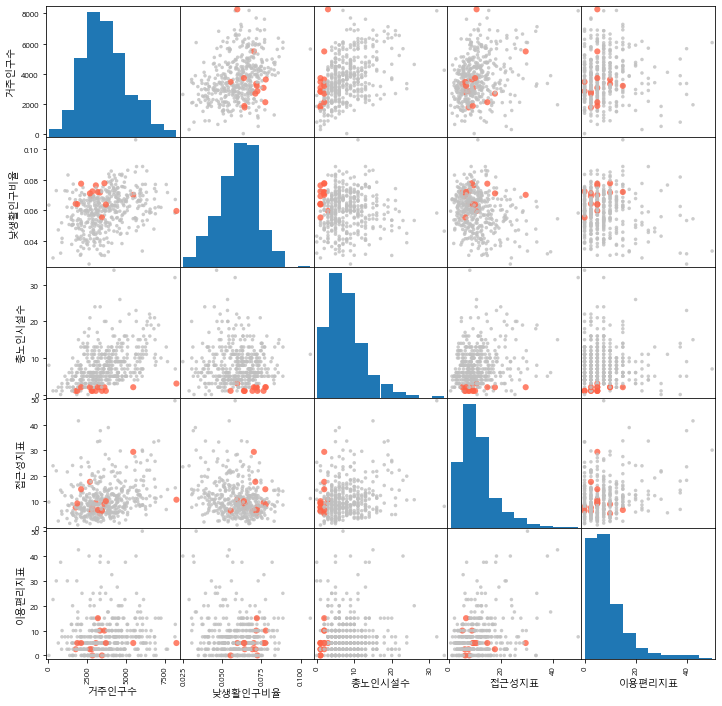

In [33]:
# 데이터 분포 확인
color_wheel = {1: "silver", 
               2: "tomato"}
colors = hjd_df["target"].map(lambda x: color_wheel.get(x + 1))
ax = pd.plotting.scatter_matrix(hjd_df_plot, color=colors, alpha=0.8, s=(hjd_df['target']+0.5)*100, figsize=(12, 12), diagonal='hist')

In [34]:
# 상관계수 행렬
hjd_df_cor = hjd_df[['거주인구수','낮생활인구비율','총노인시설수','접근성지표','이용편리지표']]
corr = hjd_df_cor.corr(method = 'pearson')
corr

,거주인구수,낮생활인구비율,총노인시설수,접근성지표,이용편리지표
거주인구수,1.000000,0.325639,0.449034,0.263270,0.060493
낮생활인구비율,0.325639,1.000000,-0.028263,-0.237683,-0.109605
총노인시설수,0.449034,-0.028263,1.000000,0.248215,0.001985
접근성지표,0.263270,-0.237683,0.248215,1.000000,0.270585
이용편리지표,0.060493,-0.109605,0.001985,0.270585,1.000000


In [35]:
# 거주인구수 제거
clu_data = hjd_df[['낮생활인구비율','총노인시설수','접근성지표','이용편리지표']]
clu_data.head(3)

,낮생활인구비율,총노인시설수,접근성지표,이용편리지표
0,0.042984,0,10.845083,30.0
1,0.047104,2,2.304008,5.0
2,0.064248,1,7.574081,2.5


In [36]:
# 정규화
from sklearn.preprocessing import minmax_scale
clu_data_n = minmax_scale(clu_data)
clu_data_n

array([[0.2243736 , 0.        , 0.20717951, 0.6       ],
       [0.27487464, 0.05882353, 0.03179583, 0.1       ],
       [0.48501624, 0.02941176, 0.14001228, 0.05      ],
       ...,
       [0.50436063, 0.26470588, 0.15011032, 0.3       ],
       [0.54662392, 0.44117647, 0.24122973, 0.2       ],
       [0.57556453, 0.26470588, 0.28562478, 0.05      ]])

In [37]:
clu_data['낮생활인구비율'] = [row[0] for row in clu_data_n]
clu_data['총노인시설수'] = [row[1] for row in clu_data_n]
clu_data['접근성지표'] = [row[2] for row in clu_data_n]
clu_data['이용편리지표'] = [row[3] for row in clu_data_n]

In [38]:
clu_data.head(3)

,낮생활인구비율,총노인시설수,접근성지표,이용편리지표
0,0.224374,0.000000,0.207180,0.60
1,0.274875,0.058824,0.031796,0.10
2,0.485016,0.029412,0.140012,0.05


In [39]:
clu_data = (clu_data*100).round(1)

In [40]:
print(clu_data.shape)
clu_data.head(3)

(425, 4)


,낮생활인구비율,총노인시설수,접근성지표,이용편리지표
0,22.4,0.0,20.7,60.0
1,27.5,5.9,3.2,10.0
2,48.5,2.9,14.0,5.0


# 2. PCA

In [41]:
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
df_pca = pca.fit_transform(clu_data)
df_pca

array([[ 26.91211251, -45.63486122,   3.93621727],
       [-11.74266993, -17.03308438, -19.47429028],
       [-19.27714647, -11.85767481,  -5.1971521 ],
       ...,
       [  2.13622584,  -4.52719641,  14.27360687],
       [  5.69771344,  17.27152438,  15.61169742],
       [ -7.23119301,  11.45455273,   6.86186729]])

In [42]:
clu_data['pca1'] = [row[0] for row in df_pca]
clu_data['pca2'] = [row[1] for row in df_pca]
clu_data['pca3'] = [row[2] for row in df_pca]

In [43]:
clu_data_pca = clu_data[['pca1','pca2','pca3']]
clu_data_pca.head(3)

,pca1,pca2,pca3
0,26.912113,-45.634861,3.936217
1,-11.742670,-17.033084,-19.474290
2,-19.277146,-11.857675,-5.197152


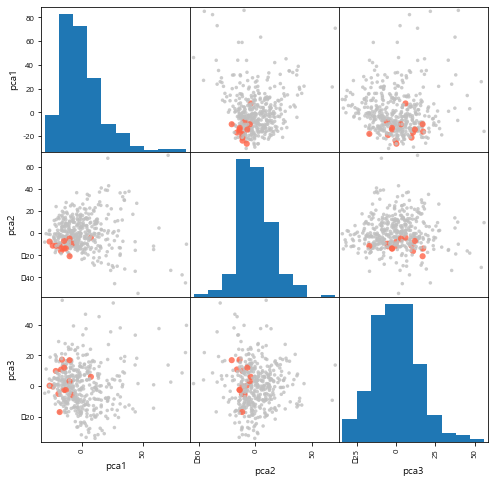

In [44]:
# 차원축소후 분포 확인
color_wheel = {1: "silver", 
               2: "tomato"}
colors = hjd_df['target'].map(lambda x: color_wheel.get(x + 1))
ax = pd.plotting.scatter_matrix(clu_data_pca, color=colors, alpha=0.8, s=(hjd_df['target']+0.5)*100, figsize=(8, 8), diagonal='hist')

# 3. K-means

In [45]:
# X = clu_data.iloc[:, [0,1,2]].astype("int")
X = clu_data_pca.iloc[:, [0,1,2]].astype("int")
y = hjd_df['target']   # y 값은 군집에서 사용하지 않는다

from sklearn.cluster import KMeans
model = KMeans(5)
model.fit(X)

KMeans(n_clusters=5)

In [46]:
labels = model.labels_

In [47]:
plot_df = X
plot_df['y'] = y
plot_df['p'] = labels
plot_df.head(3)

,pca1,pca2,pca3,y,p
0,26,-45,3,0,3
1,-11,-17,-19,0,0
2,-19,-11,-5,1,4


In [48]:
plot_df1 = plot_df[plot_df['y']==0]
plot_df2 = plot_df[plot_df['y']==1]

In [49]:
plot_df_c1 = plot_df[plot_df['p']==0]
plot_df_c2 = plot_df[plot_df['p']==1]
plot_df_c3 = plot_df[plot_df['p']==2]
plot_df_c4 = plot_df[plot_df['p']==3]
plot_df_c5 = plot_df[plot_df['p']==4]

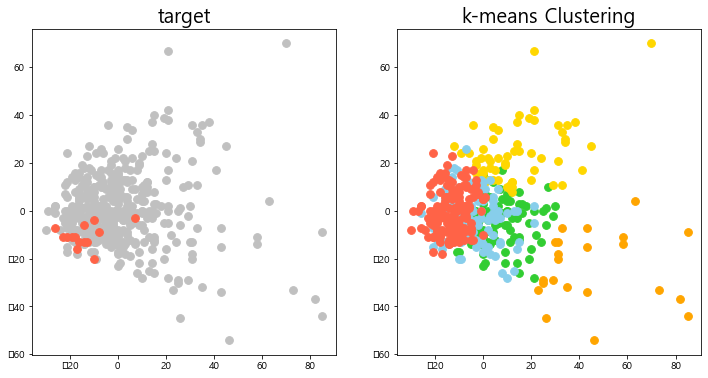

In [50]:
plt.figure(figsize=[12,6])

plt.subplot(1,2,1)
plt.title('target', fontsize=20)

plt.scatter(plot_df1['pca1'], plot_df1['pca2'], c="silver", s=60)
plt.scatter(plot_df2['pca1'], plot_df2['pca2'], c="tomato", s=60)
# plt.colorbar()

plt.subplot(1,2,2)
plt.title('k-means Clustering', fontsize=20)
plt.scatter(plot_df_c1['pca1'], plot_df_c1['pca2'], c="limegreen", s=60)
plt.scatter(plot_df_c2['pca1'], plot_df_c2['pca2'], c="gold", s=60)
plt.scatter(plot_df_c3['pca1'], plot_df_c3['pca2'], c="skyblue", s=60)
plt.scatter(plot_df_c4['pca1'], plot_df_c4['pca2'], c="orange", s=60)
plt.scatter(plot_df_c5['pca1'], plot_df_c5['pca2'], c="tomato", s=60)
# plt.colorbar()

In [51]:
hjd_df['kmeansP'] = plot_df['p']

In [52]:
hjd_df[hjd_df['target']==1]

,행정동코드,읍면동코드,자치행정동,자치구,행정동,거주인구수,낮생활인구비율,총노인시설수,접근성지표,이용편리지표,target,kmeansP
2,11110550,1101055,종로구 부암동,종로구,부암동,1763,0.064248,1,7.574081,2.5,1,4
69,11215760,1105057,광진구 중곡3동,광진구,중곡3동,2793,0.069232,1,6.141288,2.5,1,4
86,11230560,1106083,동대문구 전농1동,동대문구,전농1동,5478,0.070116,2,29.408644,5.0,1,2
104,11260660,1107068,중랑구 망우3동,중랑구,망우3동,3331,0.071612,2,5.219833,10.0,1,2
110,11290580,1108058,성북구 돈암1동,성북구,돈암1동,2845,0.072408,1,7.842188,0.0,1,4
123,11290770,1108077,성북구 장위2동,성북구,장위2동,3065,0.076337,1,9.430095,5.0,1,4
191,11380625,1112074,은평구 역촌동,은평구,역촌동,8267,0.059541,3,10.657260,5.0,1,4
194,11410640,1113064,서대문구 홍제3동,서대문구,홍제3동,3617,0.077748,2,8.889985,10.0,1,2
328,11620665,1121066,관악구 서림동,관악구,서림동,3458,0.055268,1,6.357287,0.0,1,4
345,11650550,1122056,서초구 반포본동,서초구,반포본동,1867,0.064034,1,9.202020,5.0,1,4


In [53]:
len(hjd_df[hjd_df['kmeansP']==4])

156

In [54]:
len(hjd_df[hjd_df['target']==1])

14

In [55]:
hjd_final = hjd_df.loc[(hjd_df['target']==1) & (hjd_df['kmeansP']==4)]
hjd_final.reset_index(drop=True,inplace=True)
hjd_final = hjd_final[['행정동코드','읍면동코드','자치행정동','자치구','행정동']]
hjd_final

,행정동코드,읍면동코드,자치행정동,자치구,행정동
0,11110550,1101055,종로구 부암동,종로구,부암동
1,11215760,1105057,광진구 중곡3동,광진구,중곡3동
2,11290580,1108058,성북구 돈암1동,성북구,돈암1동
3,11290770,1108077,성북구 장위2동,성북구,장위2동
4,11380625,1112074,은평구 역촌동,은평구,역촌동
5,11620665,1121066,관악구 서림동,관악구,서림동
6,11650550,1122056,서초구 반포본동,서초구,반포본동
7,11710566,1124059,송파구 오륜동,송파구,오륜동
8,11740660,1125067,강동구 성내3동,강동구,성내3동


# 4. Hierachical

In [56]:
X = clu_data.iloc[:,4:]
print(X.shape)
X.head(3)

(425, 3)


,pca1,pca2,pca3
0,26.912113,-45.634861,3.936217
1,-11.742670,-17.033084,-19.474290
2,-19.277146,-11.857675,-5.197152


In [57]:
data = X.values

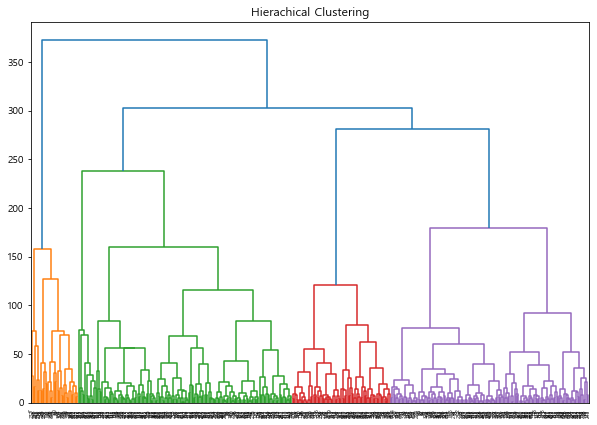

In [58]:
import scipy.cluster.hierarchy as shc

plt.figure(figsize=(10, 7))
plt.title("Hierachical Clustering")
dend = shc.dendrogram(shc.linkage(data, method='ward'))

In [59]:
from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')
cluster.fit_predict(data)

array([1, 0, 0, 0, 0, 0, 3, 1, 0, 3, 0, 0, 0, 0, 0, 3, 3, 1, 1, 1, 3, 0,
       1, 1, 0, 0, 3, 1, 0, 2, 0, 0, 0, 0, 3, 0, 0, 0, 2, 0, 3, 0, 2, 2,
       3, 3, 1, 1, 2, 1, 1, 3, 2, 2, 0, 2, 3, 3, 3, 1, 3, 0, 3, 2, 2, 3,
       3, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 0, 2, 0, 2, 1, 1, 0, 2,
       2, 2, 2, 3, 2, 0, 0, 0, 0, 2, 3, 0, 0, 1, 2, 0, 0, 4, 2, 2, 2, 1,
       0, 2, 3, 2, 2, 2, 3, 2, 2, 0, 2, 2, 0, 0, 0, 0, 3, 3, 2, 2, 2, 2,
       2, 0, 2, 0, 2, 0, 0, 2, 2, 0, 0, 2, 0, 2, 2, 2, 0, 2, 0, 0, 0, 0,
       2, 2, 2, 4, 2, 2, 4, 2, 0, 3, 2, 2, 2, 2, 2, 0, 0, 2, 2, 0, 0, 2,
       2, 2, 2, 2, 0, 2, 0, 3, 2, 2, 2, 2, 4, 0, 0, 0, 2, 2, 0, 2, 0, 2,
       3, 2, 3, 2, 3, 3, 3, 1, 3, 3, 3, 2, 1, 3, 1, 0, 3, 3, 2, 1, 2, 3,
       2, 2, 3, 2, 0, 3, 1, 2, 0, 2, 0, 0, 0, 2, 2, 4, 1, 0, 1, 0, 4, 2,
       2, 2, 2, 0, 0, 0, 0, 2, 4, 2, 2, 3, 3, 4, 0, 2, 0, 3, 4, 2, 3, 0,
       2, 2, 2, 2, 0, 2, 2, 3, 2, 2, 2, 2, 1, 1, 0, 0, 2, 2, 2, 0, 0, 2,
       1, 1, 3, 2, 3, 0, 0, 2, 0, 2, 3, 0, 0, 0, 2,

In [60]:
plot_df = X
plot_df['y'] = y
plot_df['p'] = cluster.fit_predict(data)
print(plot_df.shape)
plot_df.head(3)

(425, 5)


,pca1,pca2,pca3,y,p
0,26.912113,-45.634861,3.936217,0,1
1,-11.742670,-17.033084,-19.474290,0,0
2,-19.277146,-11.857675,-5.197152,1,0


In [61]:
plot_df1 = plot_df[plot_df['y']==0]
plot_df2 = plot_df[plot_df['y']==1]

plot_df_c1 = plot_df[plot_df['p']==0]
plot_df_c2 = plot_df[plot_df['p']==1]
plot_df_c3 = plot_df[plot_df['p']==2]
plot_df_c4 = plot_df[plot_df['p']==3]
plot_df_c5 = plot_df[plot_df['p']==4]

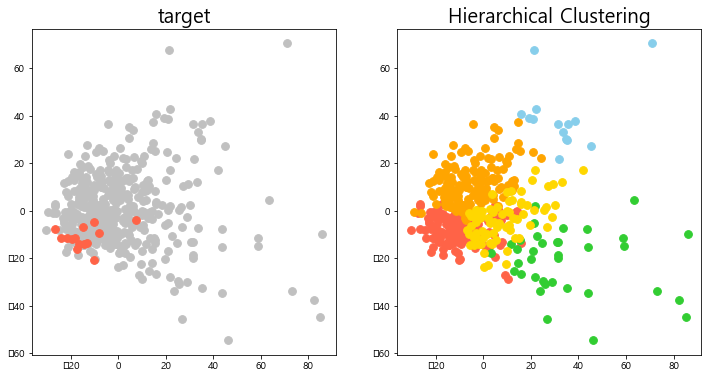

In [62]:
plt.figure(figsize=[12,6])

plt.subplot(1,2,1)
plt.title('target', fontsize=20)

plt.scatter(plot_df1['pca1'], plot_df1['pca2'], c="silver", s=60)
plt.scatter(plot_df2['pca1'], plot_df2['pca2'], c="tomato", s=60)
# plt.colorbar()

plt.subplot(1,2,2)
plt.title('Hierarchical Clustering', fontsize=20)
plt.scatter(plot_df_c1['pca1'], plot_df_c1['pca2'], c="tomato", s=60)
plt.scatter(plot_df_c2['pca1'], plot_df_c2['pca2'], c="limegreen", s=60)
plt.scatter(plot_df_c3['pca1'], plot_df_c3['pca2'], c="orange", s=60)
plt.scatter(plot_df_c4['pca1'], plot_df_c4['pca2'], c="gold", s=60)
plt.scatter(plot_df_c5['pca1'], plot_df_c5['pca2'], c="skyblue", s=60)
# plt.colorbar()

In [63]:
hjd_df['hierarchicalP'] = cluster.fit_predict(data)
hjd_df.head(3)

,행정동코드,읍면동코드,자치행정동,자치구,행정동,거주인구수,낮생활인구비율,총노인시설수,접근성지표,이용편리지표,target,kmeansP,hierarchicalP
0,11110530,1101053,종로구 사직동,종로구,사직동,1834,0.042984,0,10.845083,30.0,0,3,1
1,11110540,1101054,종로구 삼청동,종로구,삼청동,641,0.047104,2,2.304008,5.0,0,0,0
2,11110550,1101055,종로구 부암동,종로구,부암동,1763,0.064248,1,7.574081,2.5,1,4,0


In [64]:
hjd_df[hjd_df['target']==1]

,행정동코드,읍면동코드,자치행정동,자치구,행정동,거주인구수,낮생활인구비율,총노인시설수,접근성지표,이용편리지표,target,kmeansP,hierarchicalP
2,11110550,1101055,종로구 부암동,종로구,부암동,1763,0.064248,1,7.574081,2.5,1,4,0
69,11215760,1105057,광진구 중곡3동,광진구,중곡3동,2793,0.069232,1,6.141288,2.5,1,4,0
86,11230560,1106083,동대문구 전농1동,동대문구,전농1동,5478,0.070116,2,29.408644,5.0,1,2,0
104,11260660,1107068,중랑구 망우3동,중랑구,망우3동,3331,0.071612,2,5.219833,10.0,1,2,0
110,11290580,1108058,성북구 돈암1동,성북구,돈암1동,2845,0.072408,1,7.842188,0.0,1,4,0
123,11290770,1108077,성북구 장위2동,성북구,장위2동,3065,0.076337,1,9.430095,5.0,1,4,0
191,11380625,1112074,은평구 역촌동,은평구,역촌동,8267,0.059541,3,10.657260,5.0,1,4,0
194,11410640,1113064,서대문구 홍제3동,서대문구,홍제3동,3617,0.077748,2,8.889985,10.0,1,2,0
328,11620665,1121066,관악구 서림동,관악구,서림동,3458,0.055268,1,6.357287,0.0,1,4,0
345,11650550,1122056,서초구 반포본동,서초구,반포본동,1867,0.064034,1,9.202020,5.0,1,4,0


In [65]:
hjd_final = hjd_df.loc[(hjd_df['target']==1) & (hjd_df['hierarchicalP']==0)]
hjd_final.reset_index(drop=True,inplace=True)
hjd_final = hjd_final[['행정동코드','읍면동코드','자치행정동','자치구','행정동']]
hjd_final

,행정동코드,읍면동코드,자치행정동,자치구,행정동
0,11110550,1101055,종로구 부암동,종로구,부암동
1,11215760,1105057,광진구 중곡3동,광진구,중곡3동
2,11230560,1106083,동대문구 전농1동,동대문구,전농1동
3,11260660,1107068,중랑구 망우3동,중랑구,망우3동
4,11290580,1108058,성북구 돈암1동,성북구,돈암1동
5,11290770,1108077,성북구 장위2동,성북구,장위2동
6,11380625,1112074,은평구 역촌동,은평구,역촌동
7,11410640,1113064,서대문구 홍제3동,서대문구,홍제3동
8,11620665,1121066,관악구 서림동,관악구,서림동
9,11650550,1122056,서초구 반포본동,서초구,반포본동


In [66]:
hjd_final.to_csv("./data/최종행정동.csv",encoding='cp949', index=False)

# 5. meanshift

In [67]:
X = clu_data.iloc[:,4:]
print(X.shape)
X.head(3)

(425, 3)


,pca1,pca2,pca3
0,26.912113,-45.634861,3.936217
1,-11.742670,-17.033084,-19.474290
2,-19.277146,-11.857675,-5.197152


In [68]:
from sklearn.cluster import estimate_bandwidth

bandwidth = estimate_bandwidth(X)
print('bandwidth 값:', round(bandwidth,3))

bandwidth 값: 25.974


In [69]:
from sklearn.cluster import MeanShift

meanshift= MeanShift(bandwidth=25.974)
cluster_labels = meanshift.fit_predict(X)
print('cluster labels 유형:', np.unique(cluster_labels))

cluster labels 유형: [0 1 2 3 4 5 6]


In [70]:
import pandas as pd

clusterDF = X
clusterDF['y'] = y

# estimate_bandwidth()로 최적의 bandwidth 계산
best_bandwidth = estimate_bandwidth(X)

meanshift= MeanShift(bandwidth=25.974)
cluster_labels = meanshift.fit_predict(X)
print('cluster labels 유형:',np.unique(cluster_labels))    

cluster labels 유형: [0 1 2 3 4 5 6]


In [71]:
print(clusterDF.shape)
clusterDF.head(3)

(425, 4)


,pca1,pca2,pca3,y
0,26.912113,-45.634861,3.936217,0
1,-11.742670,-17.033084,-19.474290,0
2,-19.277146,-11.857675,-5.197152,1


In [72]:
plot_df = X
# plot_df['y'] = y
plot_df['p'] = cluster_labels
print(plot_df.shape)
plot_df.head(3)

(425, 5)


,pca1,pca2,pca3,y,p
0,26.912113,-45.634861,3.936217,0,2
1,-11.742670,-17.033084,-19.474290,0,0
2,-19.277146,-11.857675,-5.197152,1,0


In [73]:
plot_df1 = plot_df[plot_df['y']==0]
plot_df2 = plot_df[plot_df['y']==1]

plot_df_c1 = plot_df[plot_df['p']==0]
plot_df_c2 = plot_df[plot_df['p']==1]
plot_df_c3 = plot_df[plot_df['p']==2]
plot_df_c4 = plot_df[plot_df['p']==3]
plot_df_c5 = plot_df[plot_df['p']==4]

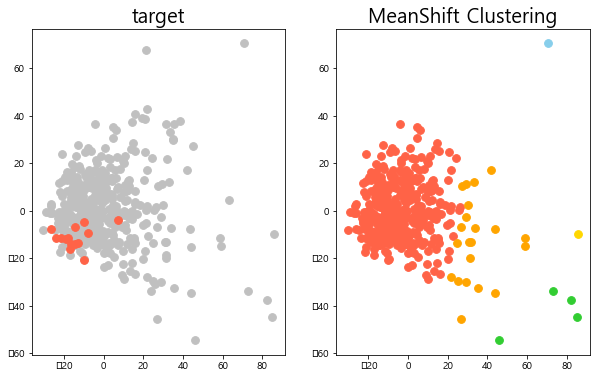

In [74]:
plt.figure(figsize=[10,6])

plt.subplot(1,2,1)
plt.title('target', fontsize=20)

plt.scatter(plot_df1['pca1'], plot_df1['pca2'], c="silver", s=60)
plt.scatter(plot_df2['pca1'], plot_df2['pca2'], c="tomato", s=60)
# plt.colorbar()

plt.subplot(1,2,2)
plt.title('MeanShift Clustering', fontsize=20)
plt.scatter(plot_df_c1['pca1'], plot_df_c1['pca2'], c="tomato", s=60)
plt.scatter(plot_df_c2['pca1'], plot_df_c2['pca2'], c="limegreen", s=60)
plt.scatter(plot_df_c3['pca1'], plot_df_c3['pca2'], c="orange", s=60)
plt.scatter(plot_df_c4['pca1'], plot_df_c4['pca2'], c="gold", s=60)
plt.scatter(plot_df_c5['pca1'], plot_df_c5['pca2'], c="skyblue", s=60)
# plt.colorbar()

In [75]:
hjd_df['MSP'] = plot_df['p']

In [76]:
hjd_final = hjd_df.loc[(hjd_df['target']==1) & (hjd_df['MSP']==0)]
hjd_final.reset_index(drop=True,inplace=True)
hjd_final = hjd_final[['행정동코드','읍면동코드','자치행정동','자치구','행정동']]
hjd_final

,행정동코드,읍면동코드,자치행정동,자치구,행정동
0,11110550,1101055,종로구 부암동,종로구,부암동
1,11215760,1105057,광진구 중곡3동,광진구,중곡3동
2,11230560,1106083,동대문구 전농1동,동대문구,전농1동
3,11260660,1107068,중랑구 망우3동,중랑구,망우3동
4,11290580,1108058,성북구 돈암1동,성북구,돈암1동
5,11290770,1108077,성북구 장위2동,성북구,장위2동
6,11380625,1112074,은평구 역촌동,은평구,역촌동
7,11410640,1113064,서대문구 홍제3동,서대문구,홍제3동
8,11620665,1121066,관악구 서림동,관악구,서림동
9,11650550,1122056,서초구 반포본동,서초구,반포본동


# 6. ranking 선정

In [77]:
clu_data_s=clu_data
clu_data_s['자치행정동'] = hjd_df['자치행정동']

In [78]:
clu_data_s['score'] = (clu_data_s['낮생활인구비율']+clu_data_s['총노인시설수']+clu_data_s['접근성지표']+clu_data_s['이용편리지표'])/4
print(clu_data_s.shape)
clu_data_s.head(3)

(425, 9)


,낮생활인구비율,총노인시설수,접근성지표,이용편리지표,pca1,pca2,pca3,자치행정동,score
0,22.4,0.0,20.7,60.0,26.912113,-45.634861,3.936217,종로구 사직동,25.775
1,27.5,5.9,3.2,10.0,-11.742670,-17.033084,-19.474290,종로구 삼청동,11.650
2,48.5,2.9,14.0,5.0,-19.277146,-11.857675,-5.197152,종로구 부암동,17.600


In [79]:
clu_data_s[clu_data_s['자치행정동']=='송파구 잠실7동']

,낮생활인구비율,총노인시설수,접근성지표,이용편리지표,pca1,pca2,pca3,자치행정동,score
402,64.7,5.9,28.8,10.0,-14.582867,-6.992813,11.928457,송파구 잠실7동,27.35


In [80]:
# rank_df = pd.read_csv('./data/행정동랭킹.csv', encoding='cp949')
# rank_df = rank_df.iloc[:7]
# rank_df

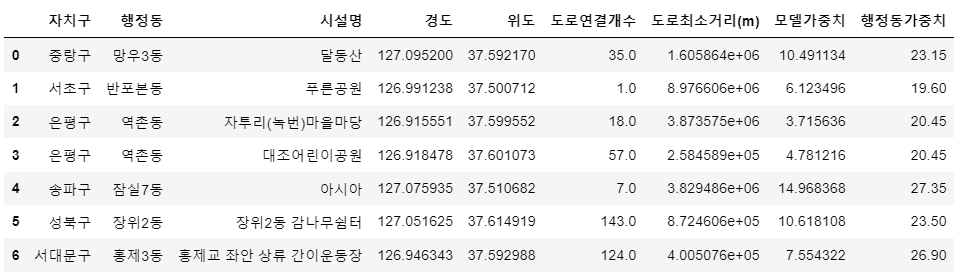

In [81]:
# rank_df =rank_df[['시설명','도로최소거리(m)','모델가중치','행정동가중치']]
# rank_df_n = minmax_scale(rank_df.iloc[:,1:])

# sc=[]
# for i in range(0,len(rank_df_n)):
#     sc.append((rank_df_n[i].mean()*100).round(1))

# (rank_df_n[0].mean()*100).round(1)

# rank_df['입지선정지수'] = sc
# rank_df = rank_df.sort_values(by=['입지선정지수'],axis=0, ascending=False)
# rank_df.reset_index(drop=True,inplace=True)
# rank_df

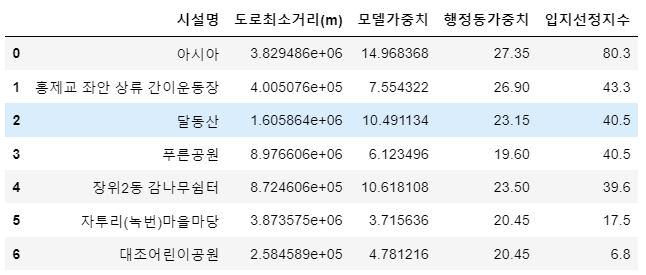